In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from matplotlib.dates import DateFormatter, DayLocator
import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
xlsx = pd.ExcelFile('WA_COVID19_Cases_Hospitalizations_Deaths.xlsx')
case = pd.read_excel(xlsx, 'Cases')
hospitalize = pd.read_excel(xlsx, 'Hospitalizations')
death=pd.read_excel(xlsx, 'Deaths')

In [4]:
case.head()

,County,WeekStartDate,ProbableCases,ConfirmedCases,TotalCases,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,dtm_updated
0,Adams County,2020-03-15,0,3,3,0,0,3,0,0,0,2020-12-10 21:50:28.348
1,Adams County,2020-03-22,0,13,13,0,2,5,6,0,0,2020-12-10 21:50:28.348
2,Adams County,2020-03-29,0,17,17,2,8,4,3,0,0,2020-12-10 21:50:28.348
3,Adams County,2020-04-05,0,8,8,1,2,4,1,0,0,2020-12-10 21:50:28.348
4,Adams County,2020-04-12,0,2,2,0,1,1,0,0,0,2020-12-10 21:50:28.348


In [5]:
hospitalize.head()

,County,WeekStartDate,Hospitalizations,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,dtm_updated
0,Adams County,2020-03-15,1,0,0,1,0,0,0,2020-12-10 21:50:28.348
1,Adams County,2020-03-22,4,0,0,1,3,0,0,2020-12-10 21:50:28.348
2,Adams County,2020-04-05,1,0,0,1,0,0,0,2020-12-10 21:50:28.348
3,Adams County,2020-06-07,1,0,0,1,0,0,0,2020-12-10 21:50:28.348
4,Adams County,2020-06-14,1,0,0,1,0,0,0,2020-12-10 21:50:28.348


In [6]:
death.head()

,County,WeekStartDate,Deaths,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,dtm_updated
0,Adams County,2020-07-12,2,0,0,0,1,1,0,2020-12-10 21:50:28.348
1,Adams County,2020-07-19,3,0,0,0,1,2,0,2020-12-10 21:50:28.348
2,Adams County,2020-08-02,3,0,0,1,1,1,0,2020-12-10 21:50:28.348
3,Adams County,2020-08-23,2,0,0,0,1,1,0,2020-12-10 21:50:28.348
4,Adams County,2020-09-06,1,0,0,1,0,0,0,2020-12-10 21:50:28.348


In [7]:
case['UpdatedDate'] = pd.to_datetime(case['dtm_updated']).dt.date
case['UpdatedTime'] = pd.to_datetime(case['dtm_updated']).dt.time
cases=case.drop(['dtm_updated'], axis = 1)
cases.head()

,County,WeekStartDate,ProbableCases,ConfirmedCases,TotalCases,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,UpdatedDate,UpdatedTime
0,Adams County,2020-03-15,0,3,3,0,0,3,0,0,0,2020-12-10,21:50:28.348000
1,Adams County,2020-03-22,0,13,13,0,2,5,6,0,0,2020-12-10,21:50:28.348000
2,Adams County,2020-03-29,0,17,17,2,8,4,3,0,0,2020-12-10,21:50:28.348000
3,Adams County,2020-04-05,0,8,8,1,2,4,1,0,0,2020-12-10,21:50:28.348000
4,Adams County,2020-04-12,0,2,2,0,1,1,0,0,0,2020-12-10,21:50:28.348000


In [8]:
hospitalize['UpdatedDate'] = pd.to_datetime(hospitalize['dtm_updated']).dt.date
hospitalize['UpdatedTime'] = pd.to_datetime(hospitalize['dtm_updated']).dt.time
hospitalized=hospitalize.drop(['dtm_updated'], axis = 1)
hospitalized.head()

,County,WeekStartDate,Hospitalizations,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,UpdatedDate,UpdatedTime
0,Adams County,2020-03-15,1,0,0,1,0,0,0,2020-12-10,21:50:28.348000
1,Adams County,2020-03-22,4,0,0,1,3,0,0,2020-12-10,21:50:28.348000
2,Adams County,2020-04-05,1,0,0,1,0,0,0,2020-12-10,21:50:28.348000
3,Adams County,2020-06-07,1,0,0,1,0,0,0,2020-12-10,21:50:28.348000
4,Adams County,2020-06-14,1,0,0,1,0,0,0,2020-12-10,21:50:28.348000


In [9]:
death['UpdatedDate'] = pd.to_datetime(death['dtm_updated']).dt.date
death['UpdatedTime'] = pd.to_datetime(death['dtm_updated']).dt.time
deaths=death.drop(['dtm_updated'], axis = 1)
deaths.head()

,County,WeekStartDate,Deaths,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,UnknownAge,UpdatedDate,UpdatedTime
0,Adams County,2020-07-12,2,0,0,0,1,1,0,2020-12-10,21:50:28.348000
1,Adams County,2020-07-19,3,0,0,0,1,2,0,2020-12-10,21:50:28.348000
2,Adams County,2020-08-02,3,0,0,1,1,1,0,2020-12-10,21:50:28.348000
3,Adams County,2020-08-23,2,0,0,0,1,1,0,2020-12-10,21:50:28.348000
4,Adams County,2020-09-06,1,0,0,1,0,0,0,2020-12-10,21:50:28.348000


In [10]:
df = pd.read_excel('PUBLIC_CDC_Event_Date_SARS.xlsx')

In [11]:
df.head()

,County,WeekStartDate,NewPos_All,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,Positive UnkAge,dtm_updated
0,Adams County,2020-03-08,4,0,1,1,2,0,0,2020-12-13 13:09:51.302
1,Adams County,2020-03-15,3,0,0,3,0,0,0,2020-12-13 13:09:51.302
2,Adams County,2020-03-22,12,0,4,4,4,0,0,2020-12-13 13:09:51.302
3,Adams County,2020-03-29,15,3,5,4,3,0,0,2020-12-13 13:09:51.302
4,Adams County,2020-04-05,7,0,2,4,1,0,0,2020-12-13 13:09:51.302


In [12]:
df['dtm_updated'].dtypes

dtype('<M8[ns]')

In [13]:
df['UpdatedDate'] = pd.to_datetime(df['dtm_updated']).dt.date
df['UpdatedTime'] = pd.to_datetime(df['dtm_updated']).dt.time

In [14]:
covid=df.drop(['dtm_updated'], axis = 1)

In [15]:
covid.head()

,County,WeekStartDate,NewPos_All,Age 0-19,Age 20-39,Age 40-59,Age 60-79,Age 80+,Positive UnkAge,UpdatedDate,UpdatedTime
0,Adams County,2020-03-08,4,0,1,1,2,0,0,2020-12-13,13:09:51.302000
1,Adams County,2020-03-15,3,0,0,3,0,0,0,2020-12-13,13:09:51.302000
2,Adams County,2020-03-22,12,0,4,4,4,0,0,2020-12-13,13:09:51.302000
3,Adams County,2020-03-29,15,3,5,4,3,0,0,2020-12-13,13:09:51.302000
4,Adams County,2020-04-05,7,0,2,4,1,0,0,2020-12-13,13:09:51.302000


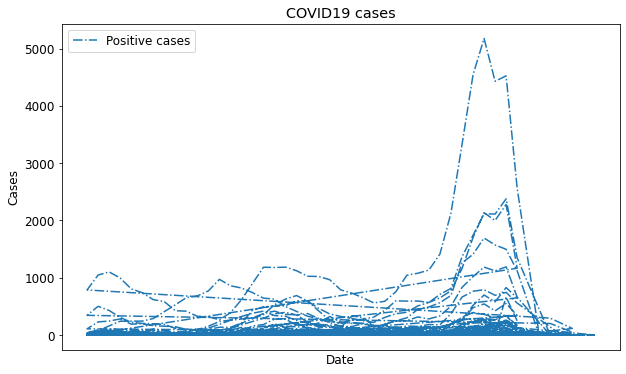

In [16]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how lines should look
ax.plot(covid.WeekStartDate, df.NewPos_All, color='tab:blue',linestyle='-.', label='Positive cases')

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('COVID19 cases')

ax.legend(loc='upper left');

ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

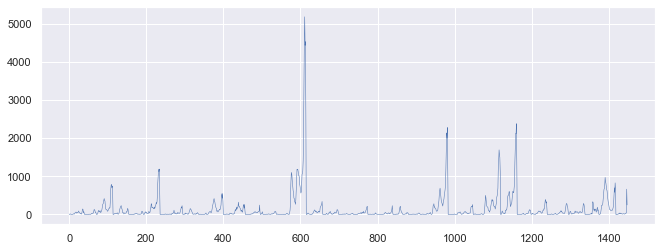

In [17]:
sns.set(rc={'figure.figsize':(11, 4)})
covid['NewPos_All'].plot(linewidth=0.5);

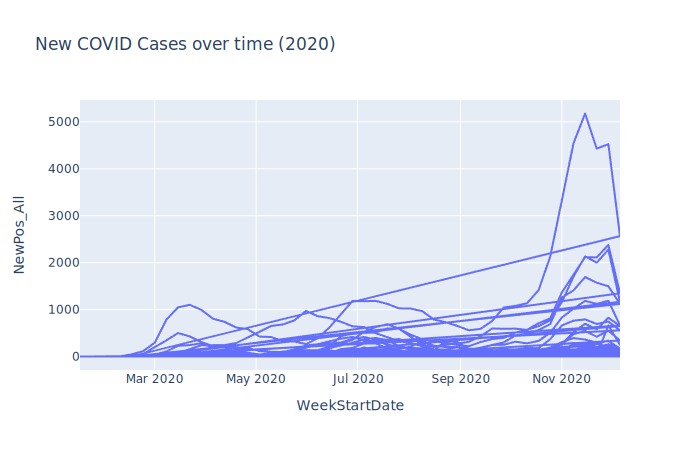

In [36]:
fig = px.line(covid, x = covid['WeekStartDate'], y = covid['NewPos_All'], title='New COVID Cases over time (2020)')
fig.show("svg")

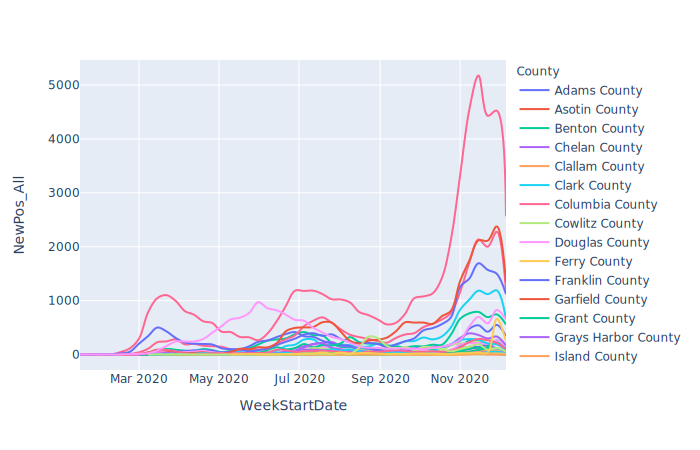

In [35]:
fig = px.line(covid, x="WeekStartDate", y="NewPos_All", color="County", line_group="County", hover_name="County",
              line_shape="spline", render_mode="svg")
fig.show("svg")

In [95]:
# df_covid = px.data.covid()
fig = px.bar(covid, x='WeekStartDate', y="NewPos_All",color="County")
fig.show()

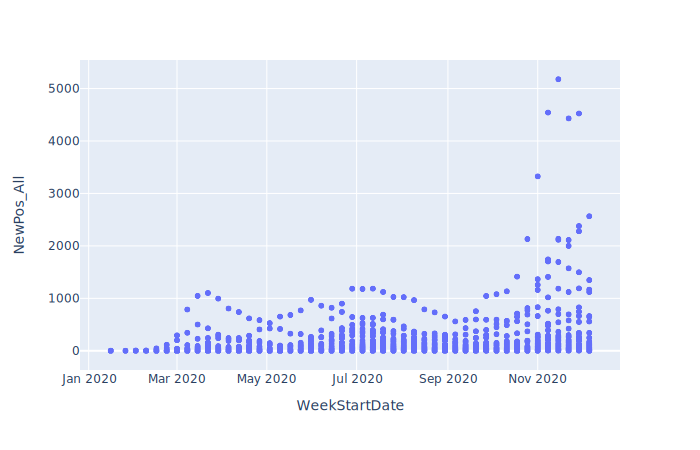

In [33]:
fig = px.scatter(covid, x="WeekStartDate", y="NewPos_All")
# fig = px.area(covid, covid="County", facet_col_wrap=2)
fig.show("svg")

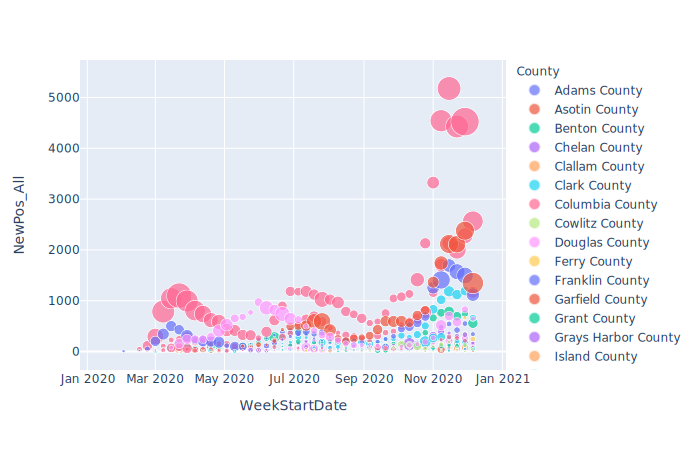

In [34]:
fig = px.scatter(covid, x=covid.WeekStartDate, y=covid.NewPos_All, color=covid.County, size=covid['Age 80+'])
fig.show("svg")

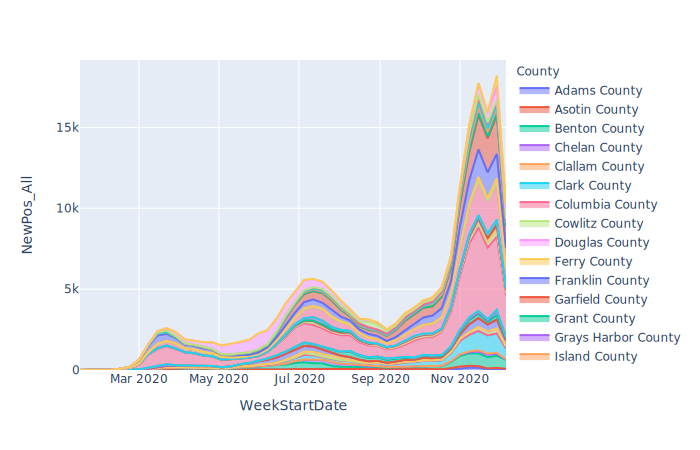

In [32]:
fig = px.area(covid, x="WeekStartDate", y="NewPos_All", color="County", line_group="County")
fig.show("svg")

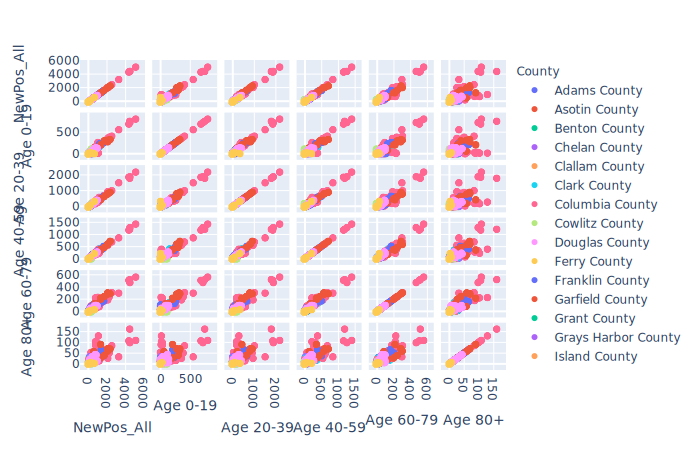

In [30]:
fig = px.scatter_matrix(covid, dimensions=["NewPos_All","Age 0-19","Age 20-39","Age 40-59", "Age 60-79", "Age 80+"], color="County")
fig.show("svg")

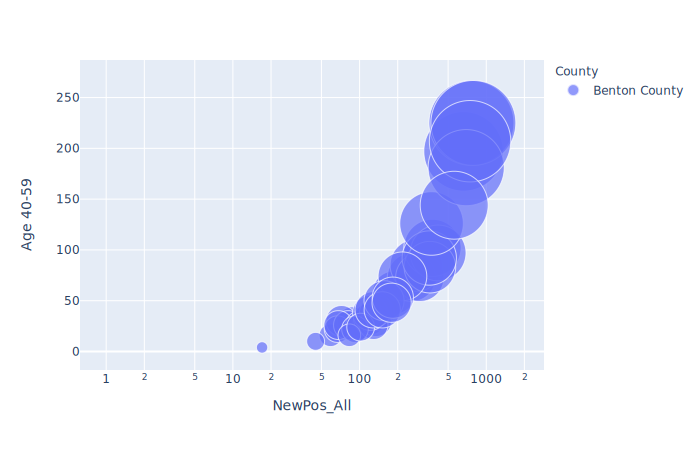

In [29]:
# q1=covid.query("County == 'Benton County'")

fig = px.scatter(covid.query("County == 'Benton County'"), x="NewPos_All", y="Age 40-59", size="Age 40-59", color="County",
                 hover_name="County", log_x=True, size_max=60)
fig.show("svg")

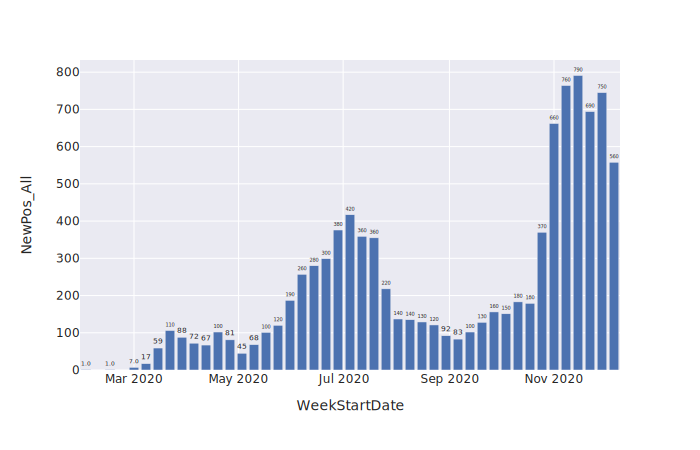

In [28]:
fig = px.bar(covid.query("County == 'Benton County'"), y='NewPos_All', x='WeekStartDate', text='NewPos_All',
            template="seaborn")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show("svg")

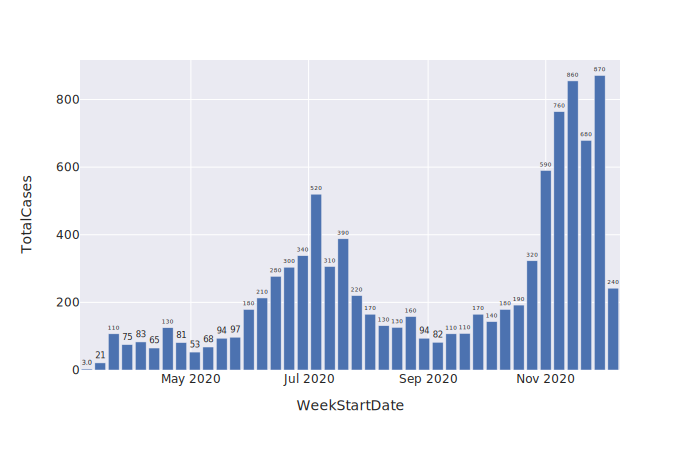

In [27]:
fig = px.bar(cases.query("County == 'Benton County'"), y='TotalCases', x='WeekStartDate', text='TotalCases',
            template="seaborn")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show("svg")

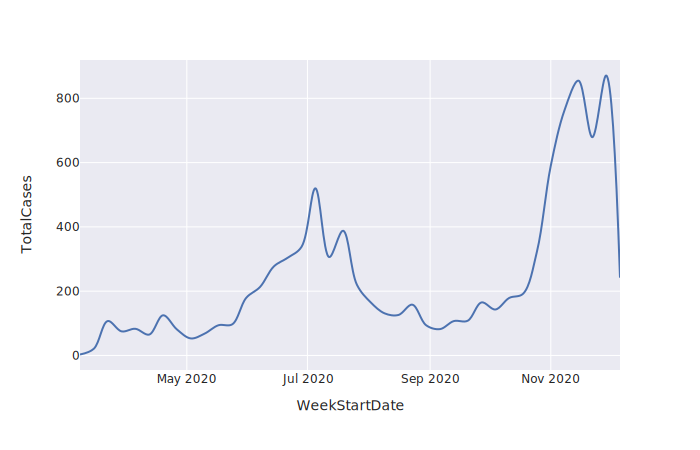

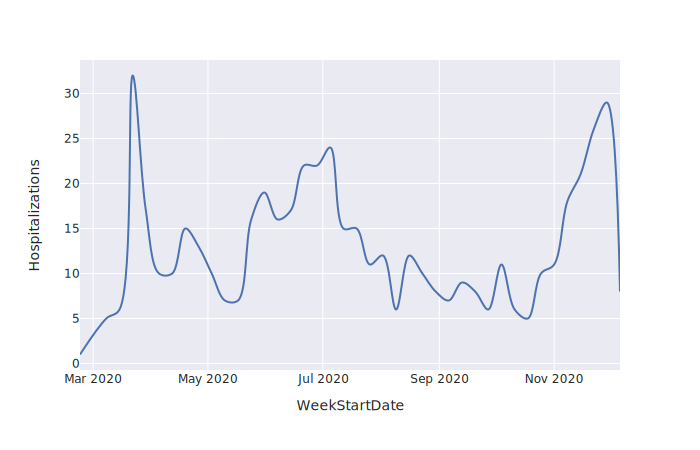

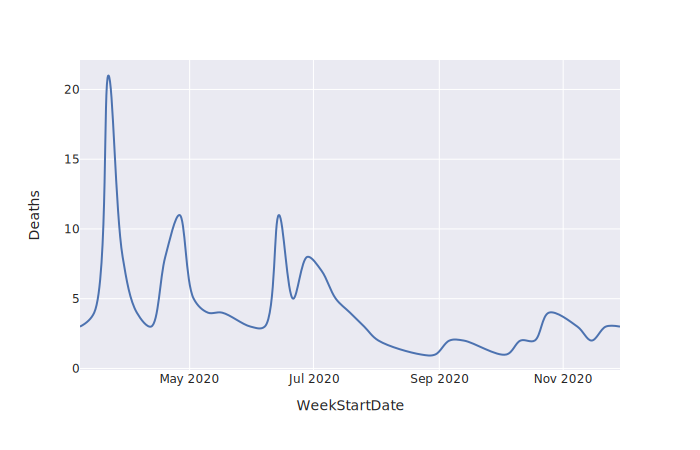

In [26]:
fig = px.line(cases.query("County == 'Benton County'"), x="WeekStartDate", y="TotalCases", hover_name="County",
              line_shape="spline", render_mode="svg",template="seaborn")
fig.show("svg")
fig = px.line(hospitalized.query("County == 'Benton County'"), x="WeekStartDate", y="Hospitalizations", hover_name="County",
              line_shape="spline", render_mode="svg",template="seaborn")
fig.show("svg")
fig = px.line(deaths.query("County == 'Benton County'"), x="WeekStartDate", y="Deaths", hover_name="County",
              line_shape="spline", render_mode="svg",template="seaborn")
# fig.show()
fig.show("svg")

In [ ]:
y = df["NewPos_All"]
max_peaks_index, _ = find_peaks(y, height=0) 
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

ax.plot(y, color = "blue", alpha = .5, label = "Positive cases")

# we have the index of max and min, so we must index the values in order to plot them
ax.scatter(x = y[max_peaks_index].index, y = y[max_peaks_index].values, marker = "^", s = 90, color = "green", alpha = .5, label = "Peaks")
# ax.scatter(x = y[min_peaks_index].index, y = y[min_peaks_index].values, marker = "v", s = 90, color = "red", alpha = .5, label = "Troughs")

# iterate over some max and min in order to annotate the values
for max_annot in zip(max_peaks_index[::3]):
    
    # extract the date to be plotted for max and min
    max_text = df.iloc[max_annot]["UpdatedDate"]
#     min_text = df.iloc[min_annot]["new_date"]
    
    # add the text
    ax.text(df.index[max_annot], y[max_annot] + 50, s = max_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')
#     ax.text(df.index[min_annot], y[min_annot] - 50, s = min_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the ylim
ax.set_ylim(0, 700)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["UpdatedDate"].tolist()[::6]

# set the xticks to be every 6'th entry
# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set the title and the legend of the plot
ax.set_title("COVID (March - December)", fontsize = 12)
ax.legend(loc = "upper left", fontsize = 10);